# Visualizing Germany COVID-19 Data

## Source of Data

 The data is from [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/covid-19)

## COVID Background

COVID-19 is an infectious disease which spreads through respiratory droplets released during a cough, sneeze, or by talking.

![german flag](https://www.publicdomainpictures.net/pictures/250000/nahled/german-flag.jpg)

In [2]:
%matplotlib inline
import pandas

## Import Data from S3 Bucket

In [4]:
df = pandas.read_excel('s3://zeng-ia241-2021spring/COVID-19-geographic-disbtribution-worldwide-2020-12-14.xls')
df[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-12-09,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-12-08,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-12-07,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-12-06,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-12-05,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


## List of Countries

In [5]:
pandas.unique(df['countriesAndTerritories'])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Er

## The Germany Data

In [6]:
germany_data=df.loc[df['countriesAndTerritories']=='Germany']
germany_data[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
21880,2020-12-14,14,12,2020,16362,188,Germany,DE,DEU,83019213.0,Europe,341.136696
21881,2020-12-13,13,12,2020,20200,321,Germany,DE,DEU,83019213.0,Europe,334.881517
21882,2020-12-12,12,12,2020,28438,496,Germany,DE,DEU,83019213.0,Europe,328.149341
21883,2020-12-11,11,12,2020,29875,598,Germany,DE,DEU,83019213.0,Europe,320.027124
21884,2020-12-10,10,12,2020,23679,440,Germany,DE,DEU,83019213.0,Europe,311.512228
21885,2020-12-09,9,12,2020,20815,590,Germany,DE,DEU,83019213.0,Europe,309.812621
21886,2020-12-08,8,12,2020,14055,423,Germany,DE,DEU,83019213.0,Europe,307.184314
21887,2020-12-07,7,12,2020,12332,147,Germany,DE,DEU,83019213.0,Europe,306.580839
21888,2020-12-06,6,12,2020,17767,255,Germany,DE,DEU,83019213.0,Europe,304.812574
21889,2020-12-05,5,12,2020,23318,483,Germany,DE,DEU,83019213.0,Europe,302.372175


##  Number of Deaths Over Time in Germany

<AxesSubplot:xlabel='dateRep'>

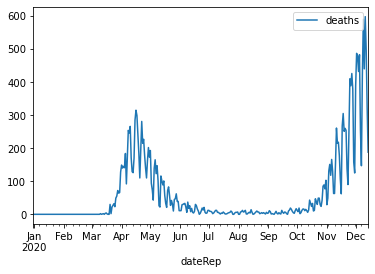

In [7]:
germany_data.sort_values(by=['dateRep']).plot(x='dateRep',y='deaths')

Based on the graph, the number of deaths over time has risen from its original peak in April and May of about 300, to then increased to over 600 deaths per day in the final days of Decemeber.

## Months With the Highest Death Rate in Germany


In [8]:
sum_deaths_per_day=df.groupby('dateRep').sum()['deaths']

<AxesSubplot:xlabel='dateRep'>

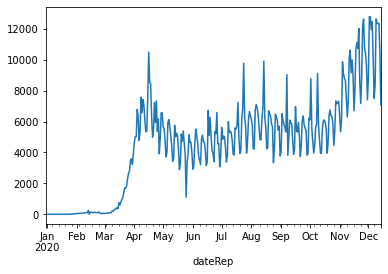

In [9]:
sum_deaths_per_day.plot()

Based on the data presented in the graph, the months that have the highest death rates in Germany are April, July, August, November, and December. This is based on the spike of deaths that occur in those respective months, as they are far above the lower death rates for the other 7 months of 2020.

## The Europe Data

In [11]:
europe_data=df.loc[df['continentExp']=='Europe']
europe_data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
340,2020-12-14,14,12,2020,788,14,Albania,AL,ALB,2862427.0,Europe,380.970414
341,2020-12-13,13,12,2020,879,12,Albania,AL,ALB,2862427.0,Europe,382.612378
342,2020-12-12,12,12,2020,802,12,Albania,AL,ALB,2862427.0,Europe,370.943958
343,2020-12-11,11,12,2020,873,14,Albania,AL,ALB,2862427.0,Europe,365.459102
344,2020-12-10,10,12,2020,752,15,Albania,AL,ALB,2862427.0,Europe,357.878122
...,...,...,...,...,...,...,...,...,...,...,...,...
58723,2020-01-04,4,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe,NaN
58724,2020-01-03,3,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe,NaN
58725,2020-01-02,2,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe,NaN
58726,2020-01-01,1,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe,NaN


## Total Overall Number of Deaths in Europe

In [12]:
sum_deaths_per_continent=df.groupby('continentExp').sum()['deaths']

<AxesSubplot:xlabel='continentExp'>

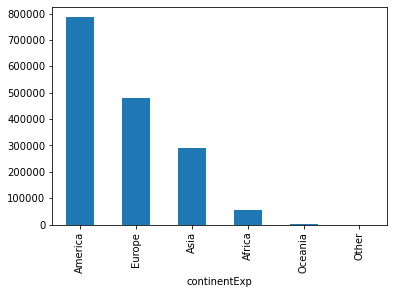

In [13]:
sum_deaths_per_continent.nlargest(10).plot.bar()

Based on the data presented in the graph, the number of deaths in the continent of Europe as a whole appears to be at a number of deaths around 500,000 deaths. It is currently the continent with the second highest number of deaths, coming in at just under 500,000 deaths behind the America's at just under 800,000.

## Explanation of Calculations

For my calculations I chose to I imported the data for all the countries and territories, to then narrow it down to Germany specifically. From there I then sorted the data between dateRep and deaths to give me the best representation of the deaths over time in Germany. After that calculation found the sum of the deaths per day in relation to dateRep and deaths, which gave me a line graph of the progression of deaths per day. Finally I sorted the data into continents, to then specify for Europe. From there I found the sum of deaths per continent, which showed the deaths in Europe, the Americas, Asia, Africa, Oceania, and others.

## Conclusion

The conclusions that I can draw from the data is that the death over time in Germany steadily rose from the beginning of 2020, peaking in the spring, summer, and then the winter months at the tail end of 2020. In addition, I found that the overall amount of deaths in Germany rose, similarly to deaths over time, with similar peaks over time. Finally I can conclude that the total number of deaths in Europe come just shy of 500,000, second only to the America's almost 800,000. The limitations of this project are that I am not an expert in programming thus far, as well as the fact that there is only so much available data, in that the data was not collected following December 20, 2020. A suggestion I would have would be to attempt to find a data source with data collected beyond December 20, 2020, other than that I have no furhter suggestions.